# Coronavirus Brasil vs Mundo - Gráficos Estáticos
> Gráficos e análises com comparações entre Brasil e países específicos

- toc: false
- branch: master
- badges: false
- comments: false
- author: Vinicius Bastos Gomes & Fernando Wittmann
- categories: [coronavirus]


In [0]:
#hide_input
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import numpy as np; np.random.seed(1)
import seaborn as sns
sns.set(style="ticks", rc={"lines.linewidth": 1.6})
sns.set_palette('bright')
import pandas as pd
from datetime import date
import io

# Montar google drive e exportar imagens
MONTAR_GDRIVE = False

In [0]:
#hide
if MONTAR_GDRIVE:
    # Montar Google Drive
    from google.colab import drive
    drive.mount('/content/drive')

In [0]:
#hide
if MONTAR_GDRIVE:
    # Abrir pasta com os arquivos
    %cd "/content/drive/My Drive/CoronaVirus Brasil"

In [132]:
#hide
# Visualizar arquivos locais
ls

2020-MES-DIA-corona-mundo.ipynb            Brasil.ipynb  dados.csv
ANO-MES-DIA-corona-mundo-interativo.ipynb  caso.csv      graficovid/
brasil-io-dados-estado.ipynb               caso.csv.gz   plots/


In [0]:
#hide
#URL = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"

#requests.get(URL)

In [134]:
#hide
print("Excluindo arquivo dados.csv")
try:
    !rm dados.csv
except:
    print("Arquivo dados.csv nao encontrado")

Excluindo arquivo dados.csv


In [135]:
#hide
!wget https://opendata.ecdc.europa.eu/covid19/casedistribution/csv -O dados.csv

--2020-03-31 00:44:55--  https://opendata.ecdc.europa.eu/covid19/casedistribution/csv
Resolving opendata.ecdc.europa.eu (opendata.ecdc.europa.eu)... 212.181.0.63
Connecting to opendata.ecdc.europa.eu (opendata.ecdc.europa.eu)|212.181.0.63|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/ [following]
--2020-03-31 00:44:57--  https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/
Reusing existing connection to opendata.ecdc.europa.eu:443.
HTTP request sent, awaiting response... 200 OK
Length: 395615 (386K) [application/octet-stream]
Saving to: ‘dados.csv’

dados.csv           100%[===================>] 386.34K   200KB/s    in 1.9s    

2020-03-31 00:44:59 (200 KB/s) - ‘dados.csv’ saved [395615/395615]



In [136]:
#hide
#datetime operations
todei = date.today()
today = todei.strftime("%d-%m-%Y")
today_us = todei.strftime("%Y-%m-%d")
today_us

'2020-03-31'

In [0]:
#hide

#url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{}.xlsx'.format(today_us)
#url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{}.xlsx'.format(today_us)

In [0]:
#hide

#url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'

In [0]:
#hide
data = pd.read_csv('dados.csv', encoding='latin-1')


In [0]:
#hide
data2 = data[data['countriesAndTerritories'].isin(['Brazil','Italy','United_States_of_America','France','South_Korea', 'Japan','United_Kingdom','China','Spain','Argentina','India','Mexico','Germany','Czech_Republic'])]


In [0]:
#hide
data3 = data2[['dateRep','cases','countriesAndTerritories']]

In [0]:
#hide 
#por 10 mil
pop_br = 20930
pop_it = 60590
pop_eua = 32570
pop_uk = 66040
pop_sk = 51470
pop_fr = 66770
pop_jp = 12680
pop_esp = 46530
pop_ar = 44270
pop_mex = 12920
pop_ind = 133900
pop_ger = 82520
pop_rc = 10641

In [0]:
#hide
germany = data3[data3['countriesAndTerritories']=='Germany']
germany.sort_index(ascending=False,inplace=True)
germany['Cumulativo'] = germany['cases'].cumsum()
germany['Relativo'] = germany['Cumulativo']/pop_ger
germany = germany[germany['Cumulativo']>=50]
germany.reset_index(drop=True, inplace=True)
germany.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
italy = data3[data3['countriesAndTerritories']=='Italy']
italy.sort_index(ascending=False,inplace=True)
italy['Cumulativo'] = italy['cases'].cumsum()
italy['Relativo'] = italy['Cumulativo']/pop_it
italy = italy[italy['Cumulativo']>=50]
italy.reset_index(drop=True, inplace=True)
italy.drop(['cases','dateRep'],axis=1,inplace=True)



In [0]:
#hide
brazil = data3[data3['countriesAndTerritories']=='Brazil']
brazil.sort_index(ascending=False,inplace=True)
brazil['Cumulativo'] = brazil['cases'].cumsum()
brazil['Relativo'] = brazil['Cumulativo']/pop_br
brazil = brazil[brazil['Cumulativo']>=50]
brazil.reset_index(drop=True, inplace=True)
brazil.drop(['cases','dateRep'],axis=1,inplace=True)





In [0]:
#hide
argentina = data3[data3['countriesAndTerritories']=='Argentina']
argentina.sort_index(ascending=False,inplace=True)
argentina['Cumulativo'] = argentina['cases'].cumsum()
argentina['Relativo'] = argentina['Cumulativo']/pop_ar
argentina = argentina[argentina['Cumulativo']>=50]
argentina.reset_index(drop=True, inplace=True)
argentina.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
japan = data3[data3['countriesAndTerritories']=='Japan']
japan.sort_index(ascending=False,inplace=True)
japan['Cumulativo'] = japan['cases'].cumsum()
japan['Relativo'] = japan['Cumulativo']/pop_jp
japan = japan[japan['Cumulativo']>=50]
japan.reset_index(drop=True, inplace=True)
japan.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
france = data3[data3['countriesAndTerritories']=='France']
france.sort_index(ascending=False,inplace=True)
france['Cumulativo'] = france['cases'].cumsum()
france['Relativo'] = france['Cumulativo']/pop_fr
france = france[france['Cumulativo']>=50]
france.reset_index(drop=True, inplace=True)
france.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
south_korea = data3[data3['countriesAndTerritories']=='South_Korea']
south_korea.sort_index(ascending=False,inplace=True)
south_korea['Cumulativo'] = south_korea['cases'].cumsum()
south_korea['Relativo'] = south_korea['Cumulativo']/pop_sk
south_korea = south_korea[south_korea['Cumulativo']>=50]
south_korea.reset_index(drop=True, inplace=True)
south_korea.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
us = data3[data3['countriesAndTerritories']=='United_States_of_America']
us.sort_index(ascending=False,inplace=True)
us['Cumulativo'] = us['cases'].cumsum()
us['Relativo'] = us['Cumulativo']/pop_eua
us = us[us['Cumulativo']>=50]
us.reset_index(drop=True, inplace=True)
us.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
uk = data3[data3['countriesAndTerritories']=='United_Kingdom']
uk.sort_index(ascending=False,inplace=True)
uk['Cumulativo'] = uk['cases'].cumsum()
uk['Relativo'] = uk['Cumulativo']/pop_uk
uk = uk[uk['Cumulativo']>=50]
uk.reset_index(drop=True, inplace=True)
uk.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
spain = data3[data3['countriesAndTerritories']=='Spain']
spain.sort_index(ascending=False,inplace=True)
spain['Cumulativo'] = spain['cases'].cumsum()
spain['Relativo'] = spain['Cumulativo']/pop_esp
spain = spain[spain['Cumulativo']>=50]
spain.reset_index(drop=True, inplace=True)
spain.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mexico = data3[data3['countriesAndTerritories']=='Mexico']
mexico.sort_index(ascending=False,inplace=True)
mexico['Cumulativo'] = mexico['cases'].cumsum()
mexico['Relativo'] = mexico['Cumulativo']/pop_esp
mexico = mexico[mexico['Cumulativo']>=50]
mexico.reset_index(drop=True, inplace=True)
mexico.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
india = data3[data3['countriesAndTerritories']=='India']
india.sort_index(ascending=False,inplace=True)
india['Cumulativo'] = india['cases'].cumsum()
india['Relativo'] = india['Cumulativo']/pop_ind
india = india[india['Cumulativo']>=50]
india.reset_index(drop=True, inplace=True)
india.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
czech_Republic = data3[data3['countriesAndTerritories']=='Czech_Republic']
czech_Republic.sort_index(ascending=False,inplace=True)
czech_Republic['Cumulativo'] = czech_Republic['cases'].cumsum()
czech_Republic['Relativo'] = czech_Republic['Cumulativo']/pop_rc
czech_Republic = czech_Republic[czech_Republic['Cumulativo']>=50]
czech_Republic.reset_index(drop=True, inplace=True)
czech_Republic.drop(['cases','dateRep'],axis=1,inplace=True)


In [0]:
#hide
#tabela final
final_data=pd.concat([brazil,italy,japan,uk,us,france,south_korea,spain,argentina,india,mexico,germany,czech_Republic],axis=0)
final_data['Dias']=final_data.index
final_data.columns = ['Países e territórios','Casos acumulados','Relativa','Dias desde o caso número 50']


In [0]:
#hide
#add pct
brazil_dupl = brazil
brazil_dupl['razao']= brazil_dupl['Cumulativo'].pct_change()
brazil_dupl['razao']=(brazil_dupl['razao']*100).round(2)
brazil_dupl['dias']= brazil_dupl.index


In [0]:
#hide
zoom = final_data[final_data['Casos acumulados']<=2500]

<center> <h2> Gráficos de contaminação </h2> </center>




In [0]:
#hide
meio_zoom = final_data[final_data['Casos acumulados']<=5000]

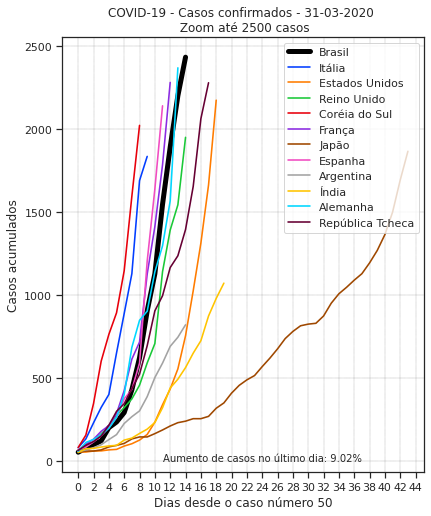

In [160]:
#hide_input
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Brazil'],color='black',linewidth=5,label='Brasil')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Czech_Republic'],label='República Tcheca',color="#660033")


razao = brazil_dupl['razao'].values[-1]
texto = 'Aumento de casos no último dia: '+ str(razao)+'%'
plt.text(11, 0,texto,fontsize=10)
plt.grid(color='black', linestyle='--', linewidth=0.17)

plt.xticks(np.arange(0,46,2))
plt.title('COVID-19 - Casos confirmados - {} \n Zoom até 2500 casos'.format(today))

if MONTAR_GDRIVE:
    plt.savefig("plots/01_corona_zoom.png")
plt.show()

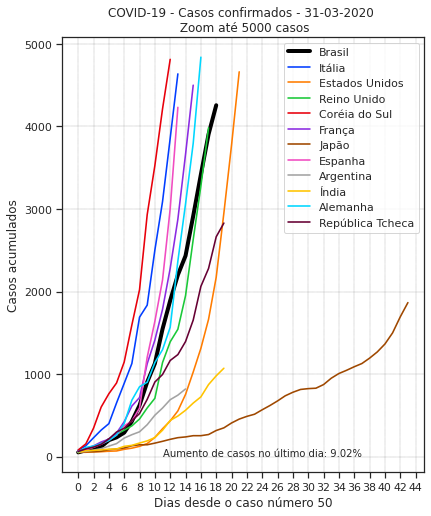

In [161]:
#hide_input
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Brazil'],color='black',linewidth=4,label='Brasil')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Czech_Republic'],label='República Tcheca',color="#660033")

plt.grid(color='black', linestyle='--', linewidth=0.17)

plt.text(11,0,texto,fontsize=10)
plt.xticks(np.arange(0,46,2))
plt.title('COVID-19 - Casos confirmados - {} \n Zoom até 5000 casos'.format(today))
if MONTAR_GDRIVE:
    plt.savefig("plots/02_corona_meio_zoom.png")
plt.show()

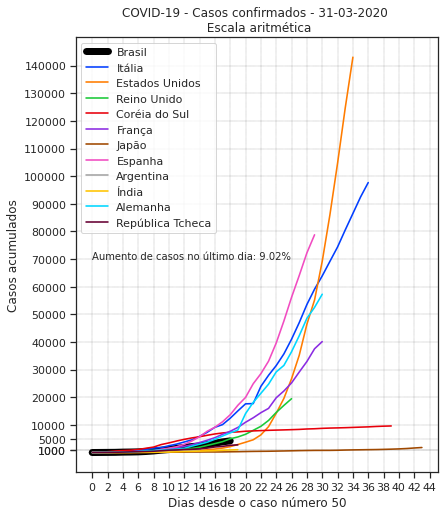

In [162]:
#hide_input
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Brazil'],color='black',linewidth=7,label='Brasil')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Czech_Republic'],label='República Tcheca',color="#660033")


plt.grid(color='black', linestyle='--', linewidth=0.17)


plt.text(0,70000,texto,fontsize=10)

plt.yticks([1000,1000,5000,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000] )
plt.xticks(np.arange(0,46,2))
plt.title('COVID-19 - Casos confirmados - {} \n Escala aritmética'.format(today))
if MONTAR_GDRIVE:
    plt.savefig("plots/04_corona_grafico_art.png")
plt.show()


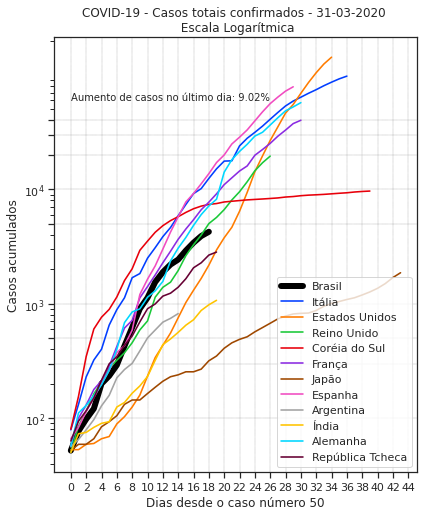

In [163]:
#hide_input
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Brazil'],color='black',linewidth=6,label='Brasil')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Italy'],label='Itália',)
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Czech_Republic'],label='República Tcheca',color="#660033")


plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.yscale('log')


plt.yticks([100,300,500,1000,5000,10000,20000,30000,40000] )
plt.xticks(np.arange(0,46,2))
plt.title('COVID-19 - Casos totais confirmados - {} \n Escala Logarítmica'.format(today))
plt.text(0,60000,texto,fontsize=10)
if MONTAR_GDRIVE:
    plt.savefig("plots/03_corona_grafico.png")
plt.show()

<center> <h2> Contaminação Relativa </h2> </center>



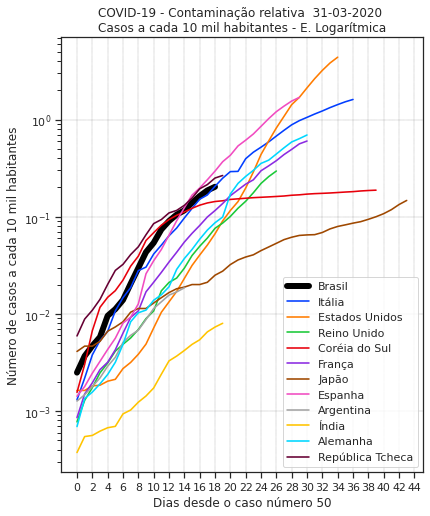

In [164]:
#hide_input
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Brazil'],color='black',linewidth=6,label='Brasil')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Czech_Republic'],label='República Tcheca',color="#660033")

plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.ylabel('Número de casos a cada 10 mil habitantes')
plt.title('COVID-19 - Contaminação relativa  {} \nCasos a cada 10 mil habitantes - E. Logarítmica'.format(today))
plt.yscale('log')
plt.xticks(np.arange(0,46,2))
if MONTAR_GDRIVE:
    plt.savefig("plots/05_relativa_exponencial.png",bbox_inches = 'tight')

#plt.ylim(0,np.power(1,-16))
plt.show()


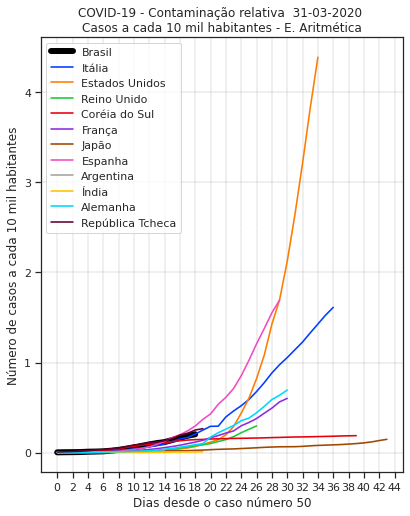

In [165]:
#hide_input
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Brazil'],color='black',linewidth=6,label='Brasil')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Czech_Republic'],label='República Tcheca',color="#660033")

plt.xticks(np.arange(0,46,2))

plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.ylabel('Número de casos a cada 10 mil habitantes')
plt.title('COVID-19 - Contaminação relativa  {} \nCasos a cada 10 mil habitantes - E. Aritmética' .format(today))
if MONTAR_GDRIVE:
    plt.savefig("plots/06_relativa_aritmetica.png")

plt.show()

<center> <h2> Mortes </h2> </center>

In [0]:
#hide
mortos = data2[['dateRep','deaths','countriesAndTerritories']]

In [0]:
#hide
mgermany = mortos[mortos['countriesAndTerritories']=='Germany']
mgermany.sort_index(ascending=False,inplace=True)
mgermany['Cumulativo'] = mgermany['deaths'].cumsum()
mgermany = mgermany[mgermany['Cumulativo']>=1]
mgermany.reset_index(drop=True, inplace=True)
mgermany.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mitaly = mortos[mortos['countriesAndTerritories']=='Italy']
mitaly.sort_index(ascending=False,inplace=True)
mitaly['Cumulativo'] = mitaly['deaths'].cumsum()
mitaly = mitaly[mitaly['Cumulativo']>=1]
mitaly.reset_index(drop=True, inplace=True)
mitaly.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
margentina = mortos[mortos['countriesAndTerritories']=='Argentina']
margentina.sort_index(ascending=False,inplace=True)
margentina['Cumulativo'] = margentina['deaths'].cumsum()
margentina = margentina[margentina['Cumulativo']>=1]
margentina.reset_index(drop=True, inplace=True)
margentina.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mbrazil = mortos[mortos['countriesAndTerritories']=='Brazil']
mbrazil.sort_index(ascending=False,inplace=True)
mbrazil['Cumulativo'] = mbrazil['deaths'].cumsum()
mbrazil = mbrazil[mbrazil['Cumulativo']>=1]
mbrazil.reset_index(drop=True, inplace=True)
mbrazil.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mjapan = mortos[mortos['countriesAndTerritories']=='Japan']
mjapan.sort_index(ascending=False,inplace=True)
mjapan['Cumulativo'] = mjapan['deaths'].cumsum()
mjapan = mjapan[mjapan['Cumulativo']>=1]
mjapan.reset_index(drop=True, inplace=True)
mjapan.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
msouth_korea = mortos[mortos['countriesAndTerritories']=='South_Korea']
msouth_korea.sort_index(ascending=False,inplace=True)
msouth_korea['Cumulativo'] = msouth_korea['deaths'].cumsum()
msouth_korea = msouth_korea[msouth_korea['Cumulativo']>=1]
msouth_korea.reset_index(drop=True, inplace=True)
msouth_korea.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mus = mortos[mortos['countriesAndTerritories']=='United_States_of_America']
mus.sort_index(ascending=False,inplace=True)
mus['Cumulativo'] = mus['deaths'].cumsum()
mus = mus[mus['Cumulativo']>=1]
mus.reset_index(drop=True, inplace=True)
mus.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mfrance = mortos[mortos['countriesAndTerritories']=='France']
mfrance.sort_index(ascending=False,inplace=True)
mfrance['Cumulativo'] = mfrance['deaths'].cumsum()
mfrance = mfrance[mfrance['Cumulativo']>=1]
mfrance.reset_index(drop=True, inplace=True)
mfrance.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
muk = mortos[mortos['countriesAndTerritories']=='United_Kingdom']
muk.sort_index(ascending=False,inplace=True)
muk['Cumulativo'] = muk['deaths'].cumsum()
muk = muk[muk['Cumulativo']>=1]
muk.reset_index(drop=True, inplace=True)
muk.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mchina = mortos[mortos['countriesAndTerritories']=='China']
mchina.sort_index(ascending=False,inplace=True)
mchina['Cumulativo'] = mchina['deaths'].cumsum()
mchina = mchina[mchina['Cumulativo']>=1]
mchina.reset_index(drop=True, inplace=True)
mchina.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mspain = mortos[mortos['countriesAndTerritories']=='Spain']
mspain.sort_index(ascending=False,inplace=True)
mspain['Cumulativo'] = mspain['deaths'].cumsum()
mspain = mspain[mspain['Cumulativo']>=1]
mspain.reset_index(drop=True, inplace=True)
mspain.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mindia = mortos[mortos['countriesAndTerritories']=='India']
mindia.sort_index(ascending=False,inplace=True)
mindia['Cumulativo'] = mindia['deaths'].cumsum()
mindia = mindia[mindia['Cumulativo']>=1]
mindia.reset_index(drop=True, inplace=True)
mindia.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
mczech = mortos[mortos['countriesAndTerritories']=='Czech_Republic']
mczech.sort_index(ascending=False,inplace=True)
mczech['Cumulativo'] = mczech['deaths'].cumsum()
mczech = mczech[mczech['Cumulativo']>=1]
mczech.reset_index(drop=True, inplace=True)
mczech.drop(['deaths','dateRep'],axis=1,inplace=True)


In [0]:
#hide
# Tabela final de mortes
mfinal_data=pd.concat([mbrazil,mitaly,mjapan,muk,mus,msouth_korea,mfrance,mchina,mspain,margentina,mindia,mgermany,mczech],axis=0)
mfinal_data['Dias']=mfinal_data.index
mfinal_data.columns = ['Países e territórios','Mortes', 'Dias desde a primeira morte']


In [0]:
#hide
mzoom = mfinal_data[mfinal_data['Mortes']<=100]

In [0]:
#hide
mmeio_zoom = mfinal_data[mfinal_data['Mortes']<=500]

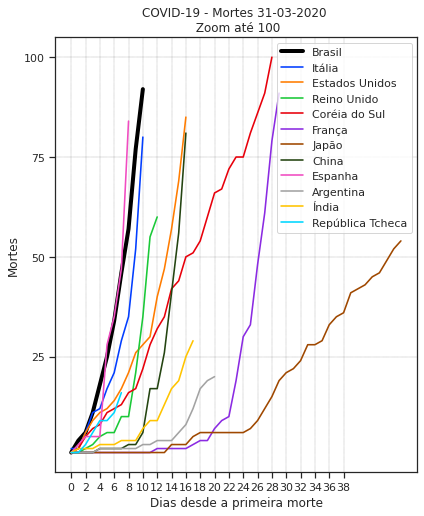

In [183]:
#hide_input
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='Brazil'],color='black',linewidth=4,label='Brasil')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='China'],label='China',color='#244411')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='Czech_Republic'],label='República Tcheca')


plt.grid(color='black', linestyle='--', linewidth=0.17)


plt.yticks([25,50,75,100])
plt.xticks([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,34, 36, 38])
plt.title('COVID-19 - Mortes {} \n Zoom até 100'.format(today))
if MONTAR_GDRIVE:
    plt.savefig("plots/05_mortes_corona_grafico_zoom.png")
plt.show()

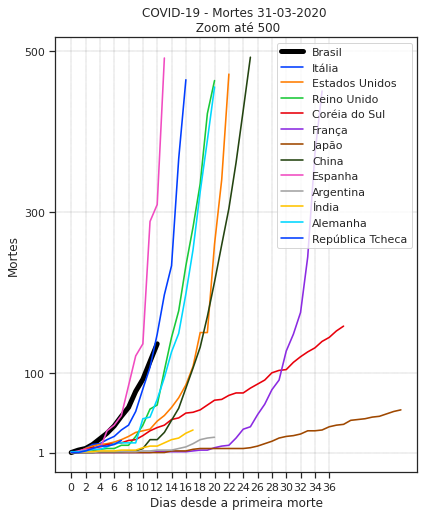

In [184]:
#hide_input
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Brazil'],color='black',linewidth=5,label='Brasil')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='China'],label='China',color='#244411')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Czech_Republic'],label='República Tcheca')


plt.grid(color='black', linestyle='--', linewidth=0.17)


plt.yticks([1,100,300,500] )
plt.xticks([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28,30,32,34,36])
plt.title('COVID-19 - Mortes {} \n Zoom até 500'.format(today))
if MONTAR_GDRIVE:
    plt.savefig("plots/08_mortes_corona_grafico_meiozoom.png")
plt.show()

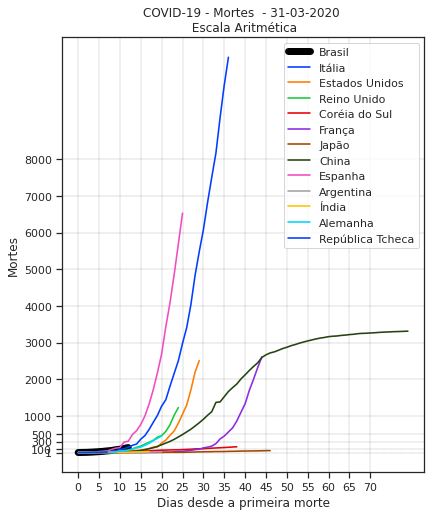

In [185]:
#hide_input
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Brazil'],color='black',linewidth=7,label='Brasil')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='China'],label='China',color='#244411')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Czech_Republic'],label='República Tcheca')

plt.grid(color='black', linestyle='--', linewidth=0.17)


plt.yticks([1,100,300,500,1000,2000,3000,4000,5000,6000,7000,8000] )
plt.xticks([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
plt.title('COVID-19 - Mortes  - {} \n Escala Aritmética'.format(today))
if MONTAR_GDRIVE:
    plt.savefig("plots/10_mortes_corona_grafico_art.png")
plt.show()

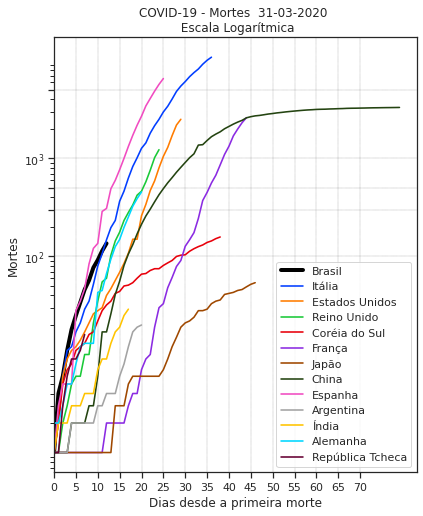

In [186]:
#hide_input
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Brazil'],color='black',linewidth=4,label='Brasil')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='China'],label='China',color='#244411')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Czech_Republic'],label='República Tcheca',color="#660033")


plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlim(70)

plt.yscale('log')
plt.yticks([100,300,500,1000,5000] )
plt.xticks([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
plt.title('COVID-19 - Mortes  {} \n Escala Logarítmica'.format(today))
if MONTAR_GDRIVE:
    plt.savefig("plots/09_mortes_corona_grafico.png")
plt.show()

In [187]:
#hide
brazil['razao']= brazil['Cumulativo'].pct_change()
brazil['razao']=(brazil['razao']*100).round(2)
brazil['dias']= brazil.index
brazil.tail(5)

,countriesAndTerritories,Cumulativo,Relativo,razao,dias
14,Brazil,2433,0.116245,10.54,14
15,Brazil,2915,0.139274,19.81,15
16,Brazil,3417,0.163258,17.22,16
17,Brazil,3904,0.186527,14.25,17
18,Brazil,4256,0.203344,9.02,18


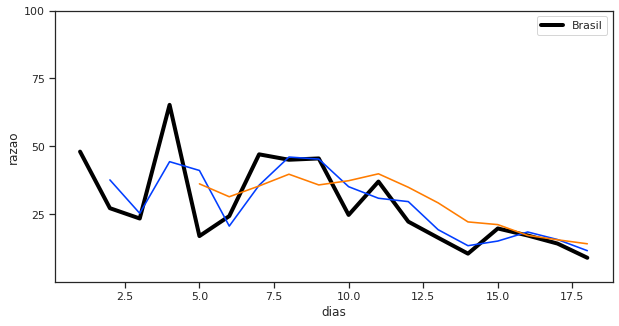

In [188]:
#hide
plt.figure(figsize=(10,5))
plt.yticks([25,50,75,100])
plt.ylim(0,100)
sns.lineplot(x='dias',y='razao',data=brazil,color='black',linewidth=4,label='Brasil')
plt.plot(brazil['razao'].rolling(2).mean(),label= 'MA 2 days')
plt.plot(brazil['razao'].rolling(5).mean(),label= 'MA 5 days')
if MONTAR_GDRIVE:
    plt.savefig("plots/pct_change.png")


<center> <h2> Letalidade </h2> </center>

In [0]:
#hide
let_brazil =((mbrazil['Cumulativo'].values[-1]/brazil['Cumulativo'].values[-1])*100).round(2)
let_us = ((mus['Cumulativo'].values[-1]/us['Cumulativo'].values[-1])*100).round(2)
let_uk = ((muk['Cumulativo'].values[-1]/uk['Cumulativo'].values[-1])*100).round(2)
let_italy = ((mitaly['Cumulativo'].values[-1]/italy['Cumulativo'].values[-1])*100).round(2)
let_spain = ((mspain['Cumulativo'].values[-1]/spain['Cumulativo'].values[-1])*100).round(2)
let_japan = ((mjapan['Cumulativo'].values[-1]/japan['Cumulativo'].values[-1])*100).round(2)
let_arg = ((margentina['Cumulativo'].values[-1]/argentina['Cumulativo'].values[-1])*100).round(2)
let_fran = ((mfrance['Cumulativo'].values[-1]/france['Cumulativo'].values[-1])*100).round(2)
let_ind = ((mindia['Cumulativo'].values[-1]/india['Cumulativo'].values[-1])*100).round(2)
let_ger = ((mgermany['Cumulativo'].values[-1]/germany['Cumulativo'].values[-1])*100).round(2)
let_rc = ((mczech['Cumulativo'].values[-1]/czech_Republic['Cumulativo'].values[-1])*100).round(2)


let= [let_brazil,let_us,let_uk,let_italy,let_spain,let_fran,let_japan,let_arg,let_ind,let_ger,let_rc]
paises = ['Brasil','EUA', 'Reino Unido','Itália','Espanha','França','Japão','Argentina','Índia','Alemanha','República Tcheca']



In [190]:
#hide
letality = pd.DataFrame()
letality['Países'] = paises
letality['Letalidade %'] = let
letality.tail(3)


,Países,Letalidade %
8,Índia,2.71
9,Alemanha,0.79
10,República Tcheca,0.57


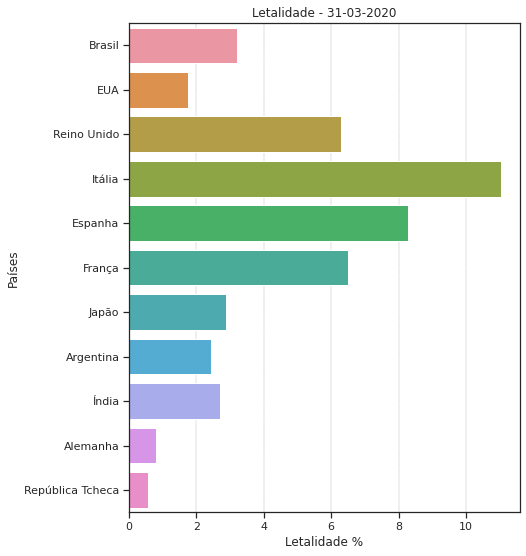

In [191]:
#hide_input
plt.figure(figsize=(7,9))
plt.ylim(0,10)
plt.title("Letalidade - {}".format(today))
sns.barplot(letality['Letalidade %'],letality['Países'])
plt.grid(axis="x",color='black', linestyle='--', linewidth=0.17)
if MONTAR_GDRIVE:
    plt.savefig("plots/11_letalidade.png")


In [192]:
#hide
final_data.columns

Index(['Países e territórios', 'Casos acumulados', 'Relativa',
       'Dias desde o caso número 50'],
      dtype='object')

In [193]:
#hide
import plotly.express as px

fig = px.line(final_data, x="Dias desde o caso número 50", y="Relativa", color='Países e territórios',color_discrete_sequence=px.colors.qualitative.G10,title="Curvas dos estados brasileiros",animation_frame='Dias desde o caso número 50',animation_group='Dias desde o caso número 50')
fig.update_layout( yaxis_type="log")

fig.show()
if MONTAR_GDRIVE:
    fig.write_html("plots/11_letalidade.html")

In [194]:
#hide
mfinal_data

,Países e territórios,Mortes,Dias desde a primeira morte
0,Brazil,1,0
1,Brazil,4,1
2,Brazil,6,2
3,Brazil,11,3
4,Brazil,18,4
...,...,...,...
3,Czech_Republic,6,3
4,Czech_Republic,9,4
5,Czech_Republic,9,5
6,Czech_Republic,11,6


In [195]:
#hide
italy
x = italy.shift(-7)
x.head(4)

,countriesAndTerritories,Cumulativo,Relativo
0,Italy,1128.0,0.018617
1,Italy,1689.0,0.027876
2,Italy,1835.0,0.030286
3,Italy,2502.0,0.041294


In [196]:
#hide
italy.head(4)

,countriesAndTerritories,Cumulativo,Relativo
0,Italy,79,0.001304
1,Italy,132,0.002179
2,Italy,229,0.003780
3,Italy,322,0.005314


In [0]:
#hide
italy['Shifted'] = x['Cumulativo']

In [198]:
#hide
italy.head(10)

,countriesAndTerritories,Cumulativo,Relativo,Shifted
0,Italy,79,0.001304,1128.0
1,Italy,132,0.002179,1689.0
2,Italy,229,0.003780,1835.0
3,Italy,322,0.005314,2502.0
4,Italy,400,0.006602,3089.0
5,Italy,650,0.010728,3858.0
6,Italy,888,0.014656,4636.0
7,Italy,1128,0.018617,5883.0
8,Italy,1689,0.027876,7375.0
9,Italy,1835,0.030286,9172.0


In [199]:
#hide
italy.tail(5)

,countriesAndTerritories,Cumulativo,Relativo,Shifted
32,Italy,74386,1.227694,NaN
33,Italy,80539,1.329246,NaN
34,Italy,86498,1.427595,NaN
35,Italy,92472,1.526192,NaN
36,Italy,97689,1.612296,NaN


In [200]:
#hide
x = np.arange(0,34,7)
x


array([ 0,  7, 14, 21, 28])

In [0]:
#hide
italyweek = pd.DataFrame()



In [0]:
#hide
italyweek = []

for i in x:
  y = italy[italy.index==i]
  italyweek.append(y)
italy_week = pd.concat(italyweek)

In [203]:
#hide
italy_week

,countriesAndTerritories,Cumulativo,Relativo,Shifted
0,Italy,79,0.001304,1128.0
7,Italy,1128,0.018617,5883.0
14,Italy,5883,0.097095,17750.0
21,Italy,17750,0.292953,53578.0
28,Italy,53578,0.884271,92472.0


In [0]:
#hide
italy1 = italy[italy.index==1]
italy2 = italy[italy.index==2]


In [0]:
#hide
italy_x = pd.concat((italy1,italy2),axis=0)

In [206]:
#hide
italy_x

,countriesAndTerritories,Cumulativo,Relativo,Shifted
1,Italy,132,0.002179,1689.0
2,Italy,229,0.003780,1835.0


In [207]:
#hide
lista = final_data['Países e territórios'].unique()
lista

array(['Brazil', 'Italy', 'Japan', 'United_Kingdom',
       'United_States_of_America', 'France', 'South_Korea', 'Spain',
       'Argentina', 'India', 'Mexico', 'Germany', 'Czech_Republic'],
      dtype=object)

In [0]:
#hide
teste = []
for x in lista:
  globals()['tabela%s' % x] = 'Hello'


In [209]:
#hide
final_data.columns

Index(['Países e territórios', 'Casos acumulados', 'Relativa',
       'Dias desde o caso número 50'],
      dtype='object')

In [0]:
#hide
cu = final_data[final_data.index<27]

In [211]:
#hide
import plotly.express as px

fig = px.bar(cu,x="Casos acumulados", y='Países e territórios', color='Países e territórios',orientation='h',
             color_discrete_sequence=px.colors.qualitative.G10,title="Curvas dos estados brasileiros",animation_frame=cu.index,range_x=[0,80000])
#fig.update_layout( yaxis_type="log")

fig.show()#hide


#fig.write_html("plots/11_letalidade.html")

In [212]:
#hide
mfinal_data

,Países e territórios,Mortes,Dias desde a primeira morte
0,Brazil,1,0
1,Brazil,4,1
2,Brazil,6,2
3,Brazil,11,3
4,Brazil,18,4
...,...,...,...
3,Czech_Republic,6,3
4,Czech_Republic,9,4
5,Czech_Republic,9,5
6,Czech_Republic,11,6


In [213]:
#hide
cu2 = mfinal_data[mfinal_data['Dias desde a primeira morte']<22]
fig = px.bar(cu2,x="Mortes", y='Países e territórios', color='Países e territórios',orientation='h',
             color_discrete_sequence=px.colors.qualitative.G10,title="Curvas dos estados brasileiros",animation_frame='Dias desde a primeira morte',range_x=[0,8000])#.update_yaxes(categoryorder='total dscending')
fig.update_layout(yaxis_type = 'category',)
#fig.update_layout(yaxi5=dict(autorange="reversed")
#fig.update_layout( yaxis_type="log")
#fig.write_html("plots/teste.html")
fig.show()


In [214]:
#hide
cu2['Países e territórios']=='Spain'

0    False
1    False
2    False
3    False
4    False
     ...  
3    False
4    False
5    False
6    False
7    False
Name: Países e territórios, Length: 257, dtype: bool